<a href="https://colab.research.google.com/github/Vaelastraszz/Air_Turbin/blob/master/Test_draft_Romain_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


In [0]:
df1 = pd.read_csv('/content/gdrive/My Drive/Interview/Turbin/T2.csv.gz', compression="gzip")

In [0]:
pd.options.display.max_columns = None

In [0]:
df1.head()

,timestamp,generator___mechanical___speed,generator___temperature,turbine_data___electrical___power_production,met_sensors___mechanical___wind_speed,met_sensors___temperature___ambient,asset_id
0,2012-06-30 22:00:00,NaN,NaN,NaN,NaN,NaN,T2
1,2012-06-30 22:00:01,NaN,NaN,NaN,NaN,NaN,T2
2,2012-06-30 22:00:02,NaN,NaN,NaN,NaN,NaN,T2
3,2012-06-30 22:00:03,NaN,NaN,NaN,NaN,NaN,T2
4,2012-06-30 22:00:04,NaN,NaN,NaN,NaN,NaN,T2


<h2> Management of empty values and non present data </h2>

In [0]:
df1.isnull().sum().sort_values(ascending=False) / df1.shape[0] * 100

met_sensors___temperature___ambient             56.855476
generator___temperature                         44.914830
turbine_data___electrical___power_production     4.788858
met_sensors___mechanical___wind_speed            4.743333
generator___mechanical___speed                   4.741380
asset_id                                         0.000000
timestamp                                        0.000000
dtype: float64

In [0]:
df1.met_sensors___temperature___ambient.isnull().sum()

17934037

In [0]:
df1=df1.dropna()

<h2> Observation of the distribution and dataset for one turbin </h2> 

In [0]:
df1.head()

,timestamp,generator___mechanical___speed,generator___temperature,turbine_data___electrical___power_production,met_sensors___mechanical___wind_speed,met_sensors___temperature___ambient,asset_id
39655,2012-07-01 09:00:55,0.888889,61.18750,0.262927,0.533203,20.421875,T2
39656,2012-07-01 09:00:56,0.889744,61.31250,0.266341,0.547363,20.484375,T2
39657,2012-07-01 09:00:57,0.888889,61.25000,0.262764,0.622070,20.531250,T2
39659,2012-07-01 09:00:59,0.884615,61.43750,0.267480,0.659180,20.500000,T2
39660,2012-07-01 09:01:00,0.886325,61.34375,0.265366,0.686523,20.484375,T2


<h3> Resampling on hour </h3>

In [0]:
df1['TIME'] = pd.to_datetime(df1['timestamp'])
df1 = df1.resample('10min', on='TIME').mean()

<h3> Beginning and end of the serie </h3>

In [0]:
df1["stamp"] = df1.index
df1["stamp"].max()

Timestamp('2013-06-26 08:20:00')

In [0]:
df1['stamp'].min()

Timestamp('2012-07-01 09:00:00')

<h3> Numeric distribution of every features </h3>

In [0]:
df1.describe()

,generator___mechanical___speed,generator___temperature,turbine_data___electrical___power_production,met_sensors___mechanical___wind_speed,met_sensors___temperature___ambient
count,49853.000000,49853.000000,49853.000000,49853.000000,49853.000000
mean,0.713696,55.562061,0.367435,0.676467,14.428495
std,0.350689,10.205117,0.361846,0.344000,6.185314
min,-0.342271,10.315399,-0.013925,0.023498,-3.017667
25%,0.637838,50.577457,0.033092,0.436450,9.289885
50%,0.849806,57.067419,0.240620,0.628580,14.856166
75%,0.994817,61.970344,0.655819,0.897365,19.829484
max,1.008205,86.689003,1.020000,2.466945,29.264767


<h3> Distribution of temperature on a Year </h3>

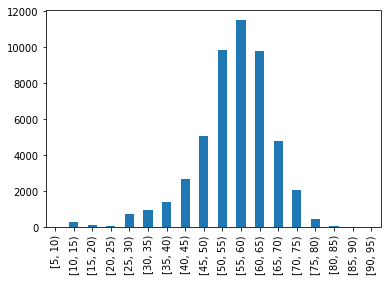

In [0]:
bin_range = np.arange(5, 100, 5)
out, bins  = pd.cut(df1.generator___temperature, bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar()

<h3> Mouvment of temperature on a year </h3>

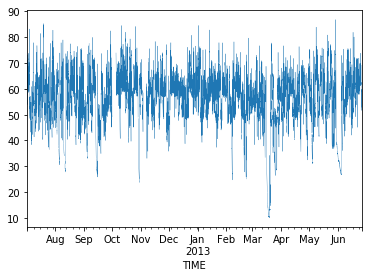

In [0]:
df1["generator___temperature"].plot(linewidth=0.3)

In [0]:
df1.head()

,generator___mechanical___speed,generator___temperature,turbine_data___electrical___power_production,met_sensors___mechanical___wind_speed,met_sensors___temperature___ambient,stamp,Deg_Norm
TIME,,,,,,,
2012-07-01 09:00:00,0.864842,61.180339,0.249685,0.613302,20.539714,2012-07-01 09:00:00,0.988021
2012-07-01 09:10:00,0.959062,61.160386,0.350641,0.685493,20.403378,2012-07-01 09:10:00,0.965979
2012-07-01 09:20:00,0.971237,61.630181,0.394129,0.679343,20.174547,2012-07-01 09:20:00,0.928983
2012-07-01 09:30:00,0.995004,62.560602,0.538853,0.768301,19.947722,2012-07-01 09:30:00,0.892311
2012-07-01 09:40:00,0.994565,63.514519,0.524520,0.777813,19.603084,2012-07-01 09:40:00,0.836593


In [0]:
import pickle

pickle.dump(df1, open('/content/gdrive/My Drive/Interview/Turbin/turbin_1.pkl','wb'))

In [0]:
import pickle

df1 = pickle.load(open('/content/gdrive/My Drive/Interview/Turbin/turbin_1.pkl','rb'))

<h2> Preparation for modeling </h2>

<h3> Processing of the data </h3>

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn import preprocessing

Using TensorFlow backend.


In [0]:
df1["Deg_Norm"]=(df1.met_sensors___temperature___ambient - df1["met_sensors___temperature___ambient"].mean())/(df1["met_sensors___temperature___ambient"].std())

In [0]:
df1=df1.dropna()
df1.isnull().sum().sort_values(ascending=False) / df1.shape[0] * 100

Deg_Norm                                        0.0
stamp                                           0.0
met_sensors___temperature___ambient             0.0
met_sensors___mechanical___wind_speed           0.0
turbine_data___electrical___power_production    0.0
generator___temperature                         0.0
generator___mechanical___speed                  0.0
dtype: float64

In [0]:
X = df1[["generator___mechanical___speed",
         "turbine_data___electrical___power_production",
         "met_sensors___mechanical___wind_speed",
         "Deg_Norm"]].to_numpy()

In [0]:
y = df1[["generator___temperature"]]
y = y.to_numpy()

In [0]:
train_size = int(X.shape[0] * 0.67)
test_size = X.shape[0] - train_size
X_train, X_test = X[0:train_size,:], X[train_size:X.shape[0],:]
y_train, y_test = y[0:train_size,:], y[train_size:X.shape[0],:]

<h3> Creation of the data generator </h3>

In [0]:
train_gen = TimeseriesGenerator(np.vstack((X_train,X_train2,X_train3,X_train4,X_train5)), np.vstack((y_train,y_train2,y_train3,y_train4,y_train5)),
                               length=20, sampling_rate=1,
                               batch_size=50)


In [0]:
test_gen = TimeseriesGenerator(X_test, y_test,
                               length=20, sampling_rate=1,
                               batch_size=50)

<h3> Model creation and training phase on each turbines </h3>

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, GRU
from keras import Model
from keras import backend as K
from keras import optimizers

In [0]:
model = Sequential()
model.add(GRU(32,
              dropout = 0.2,
              recurrent_dropout=0.2,
              input_shape=(20, 4)))
model.add(Dense(1))
model.compile(loss='mae', optimizer=optimizers.RMSprop())
history = model.fit_generator(train_gen, epochs=40).history


Epoch 1/40
3287/3287 [==============================] - 47s 14ms/step - loss: 18.2087
Epoch 2/40
3287/3287 [==============================] - 46s 14ms/step - loss: 6.3040
Epoch 3/40
3287/3287 [==============================] - 46s 14ms/step - loss: 5.9470
Epoch 4/40
3287/3287 [==============================] - 46s 14ms/step - loss: 5.7477
Epoch 5/40
3287/3287 [==============================] - 46s 14ms/step - loss: 5.6105
Epoch 6/40
3287/3287 [==============================] - 47s 14ms/step - loss: 5.5677
Epoch 7/40
3287/3287 [==============================] - 46s 14ms/step - loss: 5.4659
Epoch 8/40
3287/3287 [==============================] - 46s 14ms/step - loss: 5.4029
Epoch 9/40
3287/3287 [==============================] - 46s 14ms/step - loss: 5.3545
Epoch 10/40
3287/3287 [==============================] - 46s 14ms/step - loss: 5.3180
Epoch 11/40
3287/3287 [==============================] - 46s 14ms/step - loss: 5.3018
Epoch 12/40
3287/3287 [==============================] - 47s 1

<h3> Getting Data from All Turbines </h3>

In [0]:
#df2 = pd.read_csv('/content/gdrive/My Drive/Interview/Turbin/T1.csv.gz', compression="gzip")
#df3 = pd.read_csv('/content/gdrive/My Drive/Interview/Turbin/T3.csv.gz', compression="gzip")
#df4 = pd.read_csv('/content/gdrive/My Drive/Interview/Turbin/T4.csv.gz', compression="gzip")
df5 = pd.read_csv('/content/gdrive/My Drive/Interview/Turbin/T5.csv.gz', compression="gzip")

In [0]:
import pickle

def create_data(df,turbin_number):
    
    path = "/content/gdrive/My Drive/Interview/Turbin/Turbin{}.pkl".format(turbin_number)
    
    df=df.dropna()
    df['TIME'] = pd.to_datetime(df['timestamp'])
    df = df.resample('10min', on='TIME').mean()
    df["stamp"] = df.index
    df["Deg_Norm"]=(df.met_sensors___temperature___ambient - df["met_sensors___temperature___ambient"].mean())/(df["met_sensors___temperature___ambient"].std())
    df=df.dropna()
    pickle.dump(df, open(path,'wb'))
    X = df[["generator___mechanical___speed",
         "turbine_data___electrical___power_production",
         "met_sensors___mechanical___wind_speed",
         "Deg_Norm"]].to_numpy()
    y = df[["generator___temperature"]]
    y = y.to_numpy()
    
    return X,y

In [0]:
import pickle

def create_from_pickle(turbin_number):
    
    path = "/content/gdrive/My Drive/Interview/Turbin/Turbin{}.pkl".format(turbin_number)
    df = pickle.load(open(path,'rb'))
    df=df.dropna()
    X = df[["generator___mechanical___speed",
         "turbine_data___electrical___power_production",
         "met_sensors___mechanical___wind_speed",
         "Deg_Norm"]].to_numpy()
    y = df[["generator___temperature"]]
    y = y.to_numpy()
    
    return X,y,df

In [0]:
X_2,y_2,df2 = create_from_pickle(2)

In [0]:
X_3,y_3,df3 = create_from_pickle(3)

In [0]:
X_4,y_4,df4 = create_from_pickle(4)

In [0]:
X_5,y_5,df5 = create_from_pickle(5)

In [0]:
def split_set(X,y):
    
    train_size = int(X.shape[0] * 0.67)
    test_size = X.shape[0] - train_size
    X_train, X_test = X[0:train_size,:], X[train_size:X.shape[0],:]
    y_train, y_test = y[0:train_size,:], y[train_size:X.shape[0],:]
        
    return X_train,y_train,X_test,y_test,train_size

In [0]:
X_train2,y_train2,X_test2,y_test2,t2=split_set(X_2,y_2)

In [0]:
X_train3,y_train3,X_test3,y_test3,t3=split_set(X_3,y_3)

In [0]:
X_train4,y_train4,X_test4,y_test4,t4=split_set(X_4,y_4)

In [0]:
X_train5,y_train5,X_test5,y_test5,t5=split_set(X_5,y_5)

<h3> Training of the model on every turbines data </h3>

In [0]:
train_gen2 = TimeseriesGenerator(X_train2, y_train2,
                               length=20, sampling_rate=1,
                               batch_size=50)

train_gen3 = TimeseriesGenerator(X_train3, y_train3,
                               length=20, sampling_rate=1,
                               batch_size=50)

train_gen4 = TimeseriesGenerator(X_train4, y_train4,
                               length=20, sampling_rate=1,
                               batch_size=50)

train_gen5 = TimeseriesGenerator(X_train5, y_train5,
                               length=20, sampling_rate=1,
                               batch_size=50)

In [0]:
test_gen2 = TimeseriesGenerator(X_test2, y_test2,
                               length=20, sampling_rate=1,
                               batch_size=50)

test_gen3 = TimeseriesGenerator(X_test3, y_test3,
                               length=20, sampling_rate=1,
                               batch_size=50)

test_gen4 = TimeseriesGenerator(X_test4, y_test4,
                               length=20, sampling_rate=1,
                               batch_size=50)

test_gen5 = TimeseriesGenerator(X_test5, y_test5,
                               length=20, sampling_rate=1,
                               batch_size=50)

In [0]:
model.save('/content/gdrive/My Drive/Interview/Turbin/model.h5')

<h2> Prediction and model evaluation </h2>

<h3> MAE evaluation on every engines </h3>

In [0]:
print("Mae of turbine 1: " + str(model.evaluate_generator(test_gen)))
print("Mae of turbine 2: " + str(model.evaluate_generator(test_gen2)))
print("Mae of turbine 3: " + str(model.evaluate_generator(test_gen3)))
print("Mae of turbine 4: " + str(model.evaluate_generator(test_gen4)))
print("Mae of turbine 5: " + str(model.evaluate_generator(test_gen5)))

Mae of turbine 1: 3.7671046512747344
Mae of turbine 2: 5.761968340128255
Mae of turbine 3: 4.674757596186244
Mae of turbine 4: 6.175685681814858
Mae of turbine 5: 7.3568257193306


<H3> Generate prediction on every turbines </h3>

In [0]:
#trainPredict = model.predict_generator(train_gen)
testPredict = model.predict_generator(test_gen)

In [0]:
testPredict2 = model.predict_generator(test_gen2)
testPredict3 = model.predict_generator(test_gen3)
testPredict4 = model.predict_generator(test_gen4)
testPredict5 = model.predict_generator(test_gen5)

<h2> Plot and display normal behavior (supposed to be the model) and real behavior with the abnormal behavior on a month </h2>

<h3> Plot of the modeling and the actual curve </h3>

Text(0.5, 158.99999999999983, 'Time step')

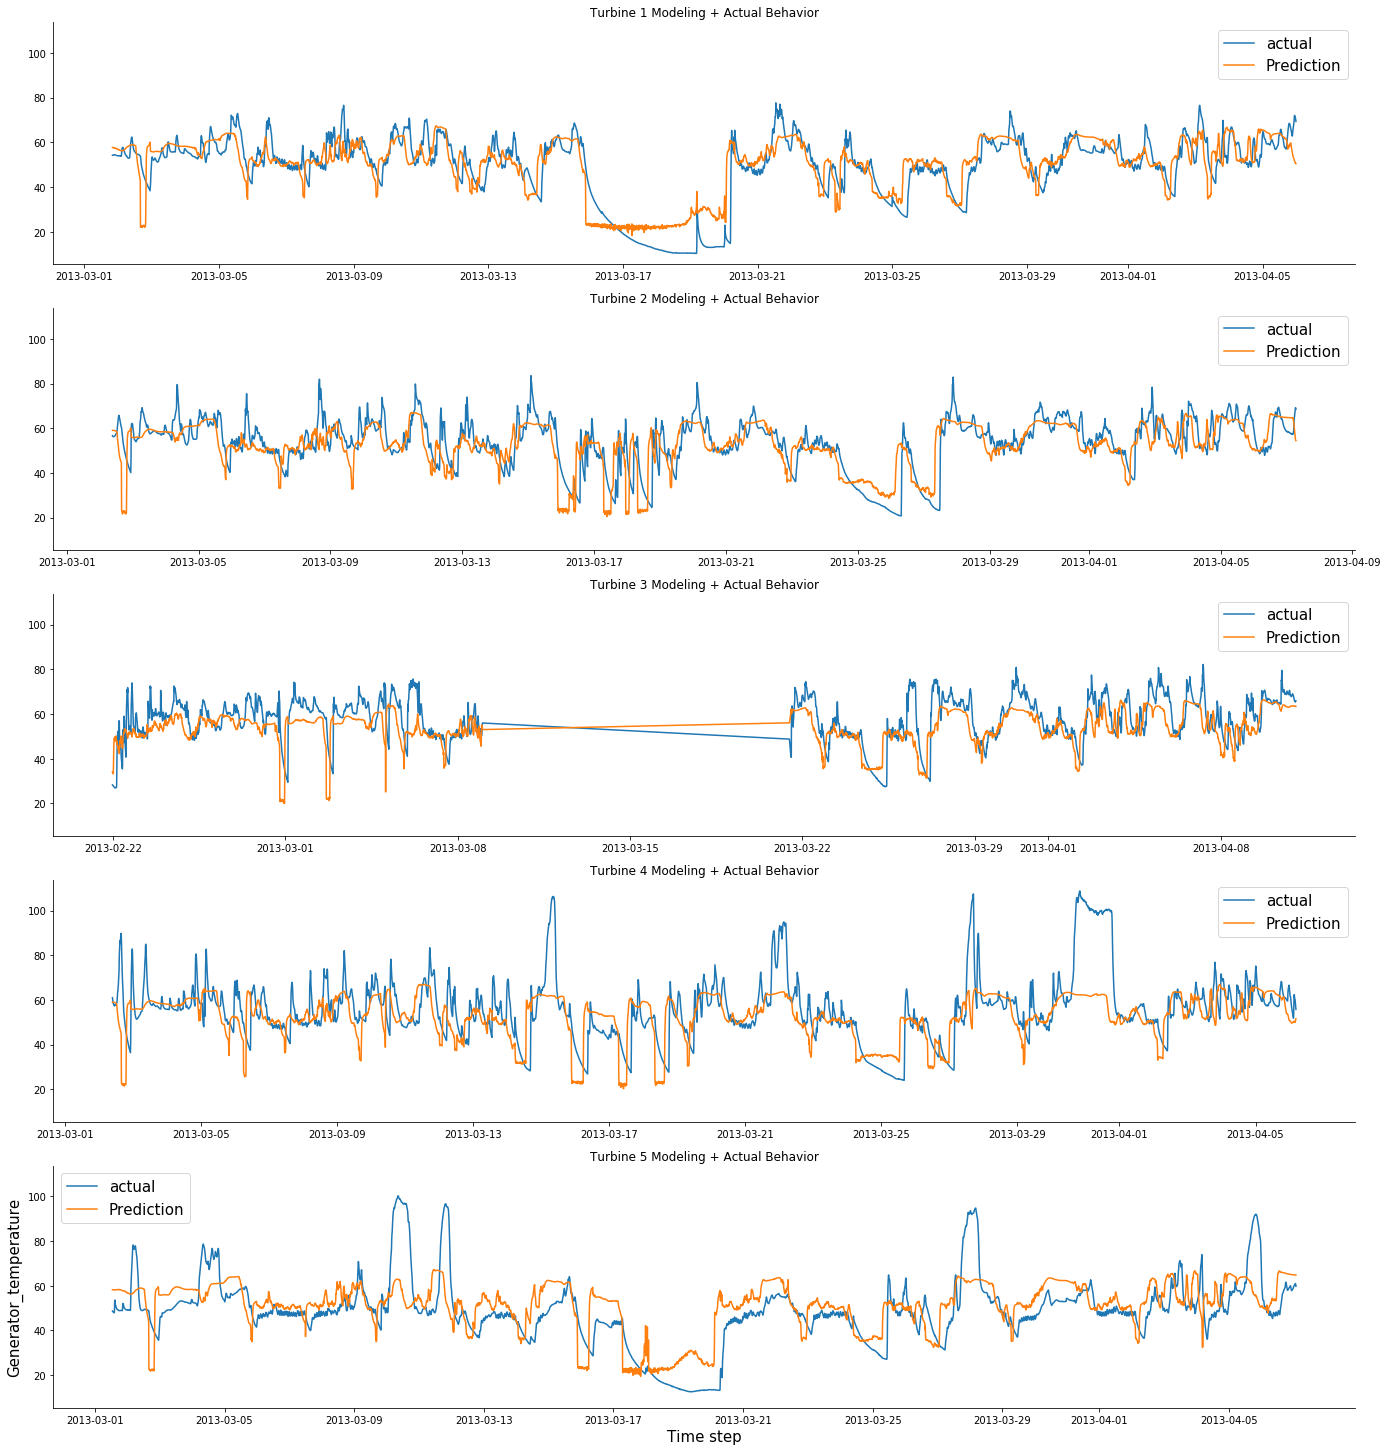

In [0]:
fig, ax = plt.subplots(nrows=5, ncols=1, sharey=True, figsize=(20,20))

ax[0].plot(df1.index.tolist()[train_size:train_size+5000], y_test[:5000], label="actual")
ax[0].plot(df1.index.tolist()[train_size:train_size+5000], testPredict[:5000], label="Prediction")
ax[0].legend(fontsize=15)
ax[0].set_title("Turbine 1 Modeling + Actual Behavior")

ax[1].plot(df2.index.tolist()[t2:t2+5000], y_test2[:5000], label="actual")
ax[1].plot(df2.index.tolist()[t2:t2+5000], testPredict2[:5000], label="Prediction")
ax[1].legend(fontsize=15)
ax[1].set_title("Turbine 2 Modeling + Actual Behavior")

ax[2].plot(df3.index.tolist()[t3:t3+5000], y_test3[:5000], label="actual")
ax[2].plot(df3.index.tolist()[t3:t3+5000], testPredict3[:5000], label="Prediction")
ax[2].legend(fontsize=15)
ax[2].set_title("Turbine 3 Modeling + Actual Behavior")

ax[3].plot(df4.index.tolist()[t4:t4+5000], y_test4[:5000], label="actual")
ax[3].plot(df4.index.tolist()[t4:t4+5000], testPredict4[:5000], label="Prediction")
ax[3].legend(fontsize=15)
ax[3].set_title("Turbine 4 Modeling + Actual Behavior")

ax[4].plot(df5.index.tolist()[t5:t5+5000], y_test5[:5000], label="actual")
ax[4].plot(df5.index.tolist()[t5:t5+5000], testPredict5[:5000], label="Prediction")
ax[4].legend(fontsize=15)
ax[4].set_title("Turbine 5 Modeling + Actual Behavior")

plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Generator_temperature', size=15)
plt.xlabel('Time step', size=15)



<h3> Anomaly detection on a month </h3>

In [0]:
pos_signal = y_test.copy()
neg_signal = y_test.copy()

pos2 = y_test2.copy()
neg2 = y_test2.copy()

pos3 = y_test3.copy()
neg3 = y_test3.copy()

pos4 = y_test4.copy()
neg4 = y_test4.copy()

pos5 = y_test5.copy()
neg5 = y_test5.copy()


mae1 = model.evaluate_generator(test_gen)
mae2 = model.evaluate_generator(test_gen2)
mae3 = model.evaluate_generator(test_gen3)
mae4 = model.evaluate_generator(test_gen4)
mae5 = model.evaluate_generator(test_gen5)

for i in range(5000):
    if abs(y_test[i] - testPredict[i]) > 3*mae1 :
        pos_signal[i] = np.nan
    
    else:
        neg_signal[i] = np.nan

            
    
    if abs(y_test2[i] - testPredict2[i]) > 3*mae2 :
        pos2[i] = np.nan
    
    else:
        neg2[i] = np.nan

    
    if abs(y_test3[i] - testPredict3[i]) > 3*mae3 :
        pos3[i] = np.nan
    
    else:
        neg3[i] = np.nan
        
        
    if abs(y_test4[i] - testPredict4[i]) > 3*mae4 :
        pos4[i] = np.nan
    
    else:
        neg4[i] = np.nan
        

    if abs(y_test5[i] - testPredict5[i]) > 3*mae5 :
        pos5[i] = np.nan
    
    else:
        neg5[i] = np.nan
   
        
    

Text(0.5, 158.99999999999983, 'Time step')

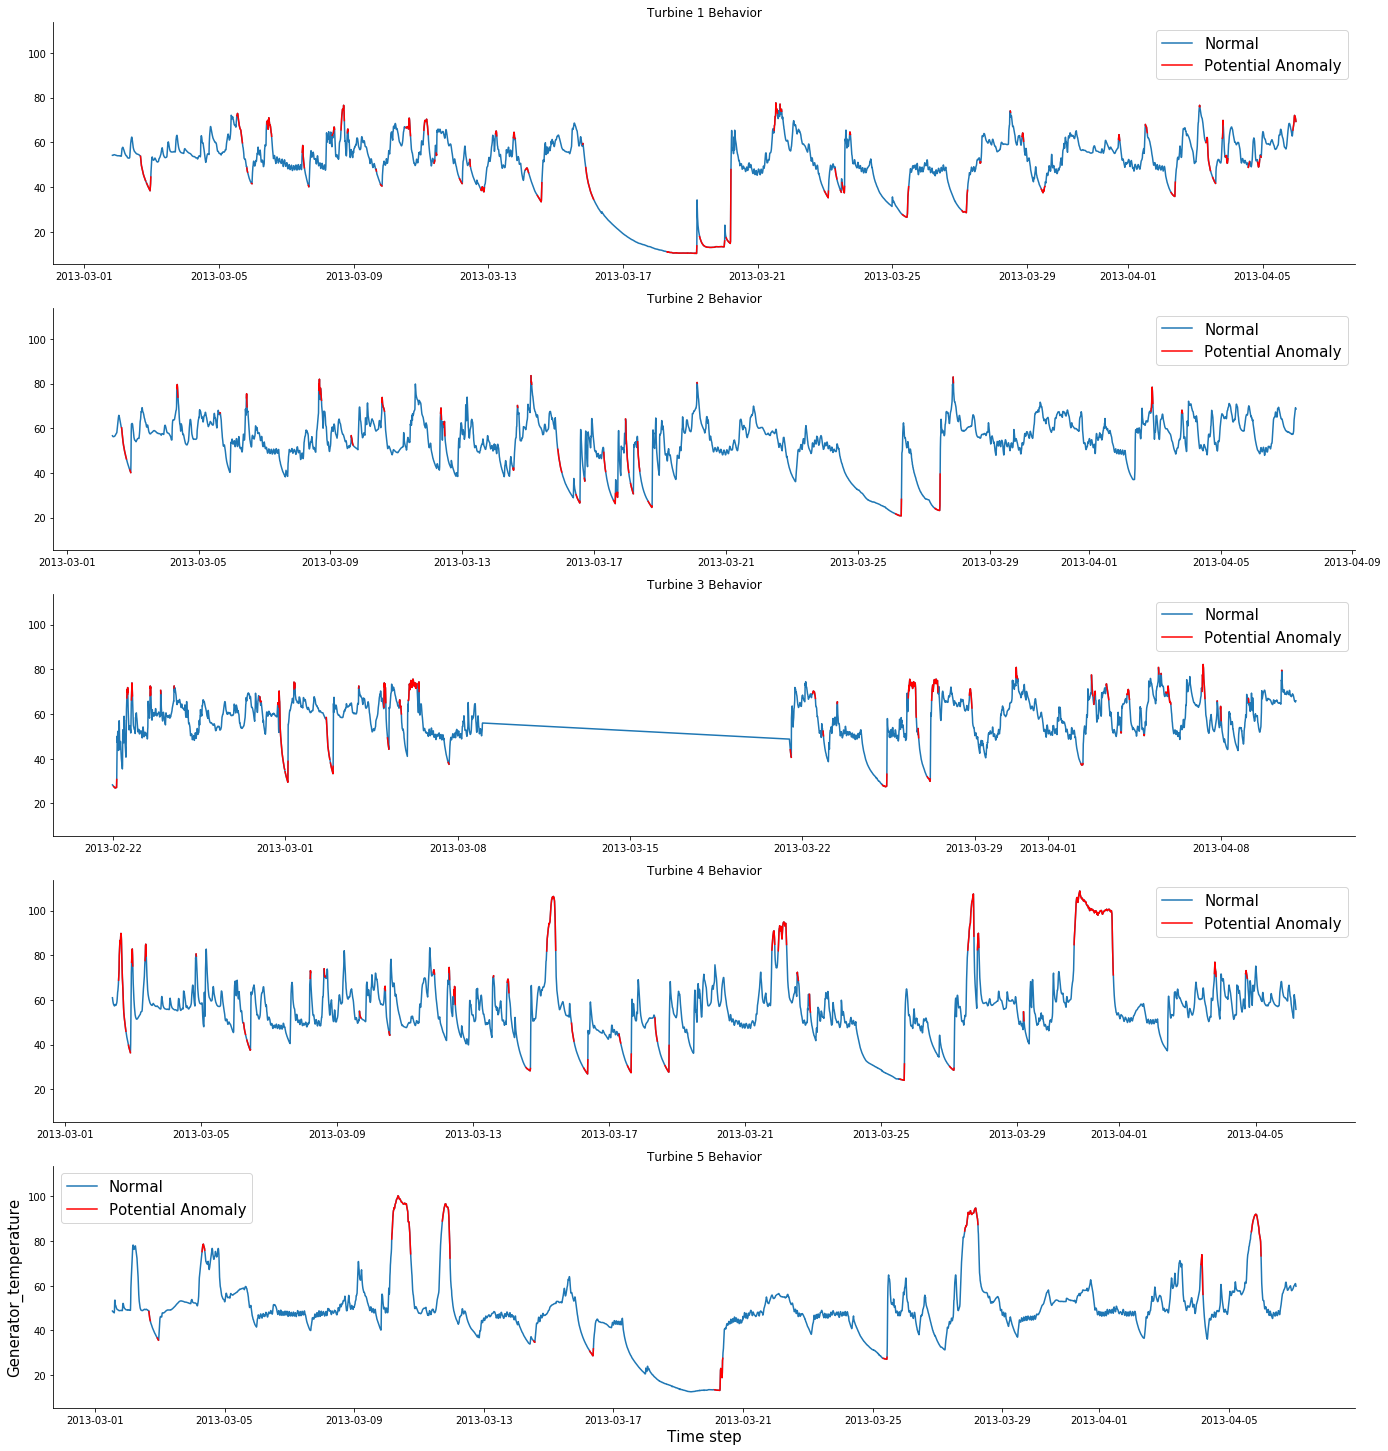

In [0]:
fig, ax = plt.subplots(nrows=5, ncols=1, sharey=True, figsize=(20,20))
y_test
ax[0].plot(df1.index.tolist()[train_size:train_size+5000], y_test[:5000], label="Normal")
ax[0].plot(df1.index.tolist()[train_size:train_size+5000], neg_signal[:5000],"r", label="Potential Anomaly")
ax[0].legend(fontsize=15)
ax[0].set_title("Turbine 1 Behavior")

ax[1].plot(df2.index.tolist()[t2:t2+5000], y_test2[:5000], label="Normal")
ax[1].plot(df2.index.tolist()[t2:t2+5000], neg2[:5000],"r", label="Potential Anomaly")
ax[1].legend(fontsize=15)
ax[1].set_title("Turbine 2 Behavior")

ax[2].plot(df3.index.tolist()[t3:t3+5000], y_test3[:5000], label="Normal")
ax[2].plot(df3.index.tolist()[t3:t3+5000], neg3[:5000],"r", label="Potential Anomaly")
ax[2].legend(fontsize=15)
ax[2].set_title("Turbine 3 Behavior")

ax[3].plot(df4.index.tolist()[t4:t4+5000], y_test4[:5000], label="Normal")
ax[3].plot(df4.index.tolist()[t4:t4+5000], neg4[:5000],"r", label="Potential Anomaly")
ax[3].legend(fontsize=15)
ax[3].set_title("Turbine 4 Behavior")

ax[4].plot(df5.index.tolist()[t5:t5+5000], y_test5[:5000], label="Normal")
ax[4].plot(df5.index.tolist()[t5:t5+5000], neg5[:5000],"r", label="Potential Anomaly")
ax[4].legend(fontsize=15)
ax[4].set_title("Turbine 5 Behavior")

plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Generator_temperature', size=15)
plt.xlabel('Time step', size=15)

<h3> Understanding of the features playing in the anomaly </h3>

As we know the turbines share the same park and same model and same environment we'll suppose the only features that could cause anomaly in one turbin when the others have not would be intern component so we'll study that

Text(0.5, 1.0, 'generator electricity production')

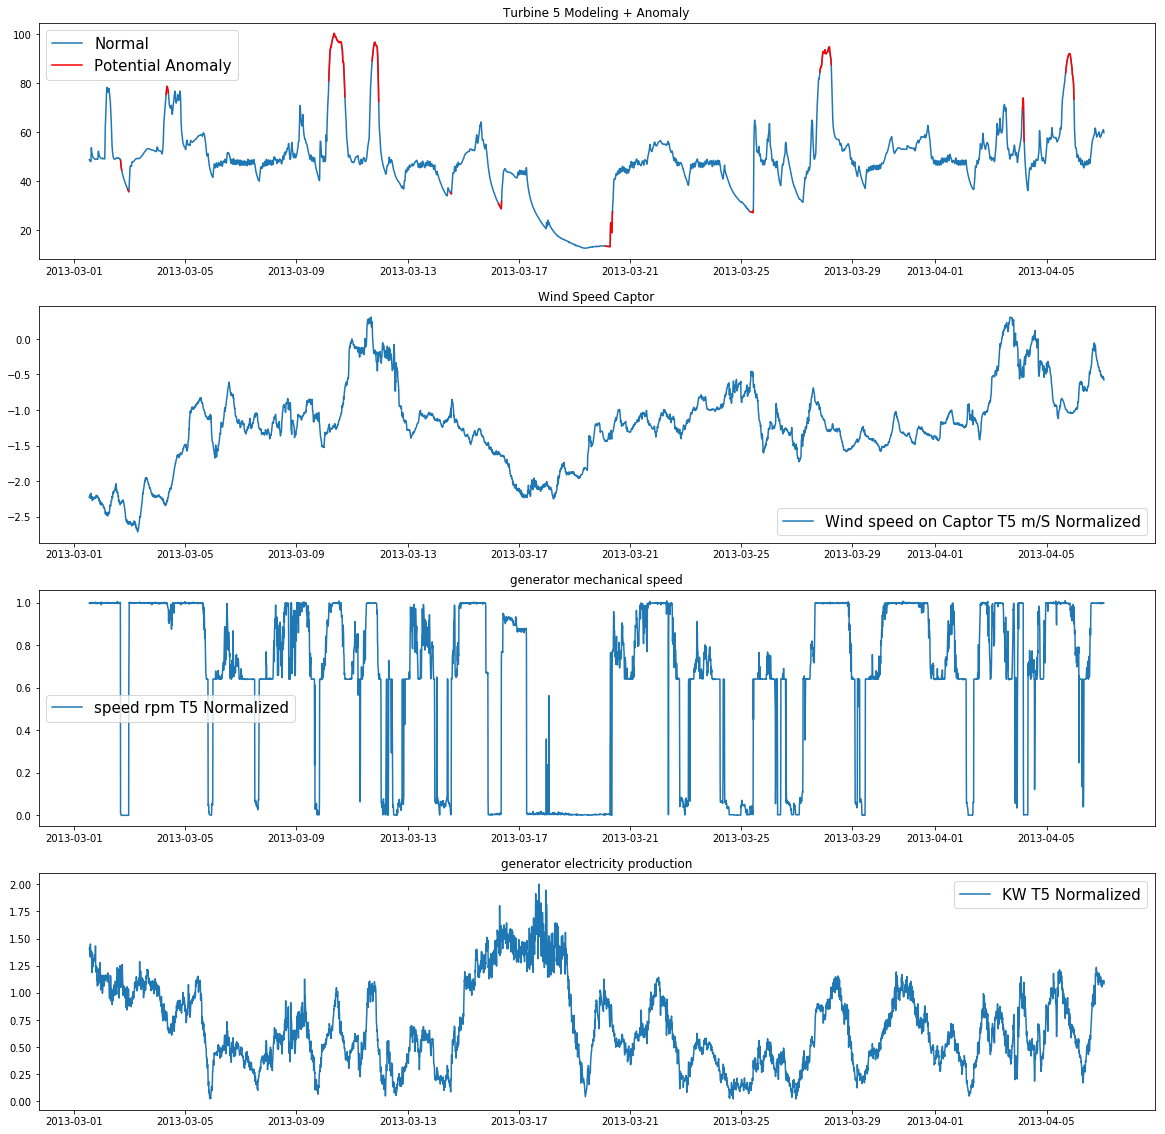

In [0]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharey=False, figsize=(20,20))

ax[0].plot(df5.index.tolist()[t5:t5+5000], y_test5[:5000], label="Normal")
ax[0].plot(df5.index.tolist()[t5:t5+5000], neg5[:5000],"r", label="Potential Anomaly")
ax[0].legend(fontsize=15)
ax[0].set_title("Turbine 5 Modeling + Anomaly")

ax[1].plot(df5.index.tolist()[t5:t5+5000], X_test5[:5000,3], label="Wind speed on Captor T5 m/S Normalized")
ax[1].legend(fontsize=15)
ax[1].set_title("Wind Speed Captor")

ax[2].plot(df5.index.tolist()[t5:t5+5000], X_test5[:5000,0], label="speed rpm T5 Normalized")
ax[2].legend(fontsize=15)
ax[2].set_title("generator mechanical speed")

ax[3].plot(df5.index.tolist()[t5:t5+5000], X_test5[:5000,2], label="KW T5 Normalized")
ax[3].legend(fontsize=15)
ax[3].set_title("generator electricity production")



Seeing the three curves with the potential anomalies we could suppose that the main factor that could cause anomaly would be an eventual big augmentation of wind speed. It has sense when we study wind turbines. I would prefer to study the cause of the prediciton with SHAP values put the deepexplainer is not working really great with my model and I did not have time to find an answer on several githubs, how to use properly a RNN with DeepExplainer.

<h3> Shap DeepExplainer </h3>

In [0]:
!pip install shap
import shap

In [0]:
shap.initjs()
e = shap.DeepExplainer(model,X_train[:20].reshape(-1,20,4))

In [0]:
shap_values = e.shap_values(X_test[:20].reshape(-1,20,4))

In [0]:
shap.force_plot(e.expected_value[0], shap_values[0][0][0], X_test[0])